# DecisionTree Regressor on Amount Spent

In [34]:
#Importing the standard libraries
import pandas as pd
import os
import pydotplus

In [35]:
#Setting the default directory
os.chdir("/Users/alokkumar/Desktop/Workspace")

In [36]:
#Reading the data from csv and displaying first five observation
data = pd.read_csv("dm.csv")
data.head(5)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [37]:
#Creating Decision Tree Regresson on Amount spent column based on other dermographic columns
#Creating the Predictior matrix and dropping AmountSpent and Cust_id
X = data.drop(['AmountSpent','Cust_Id'],axis=1)

In [38]:
X.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
0,Old,Female,Own,Single,Far,47500,0,High,6
1,Middle,Male,Rent,Single,Close,63600,0,High,6
2,Young,Female,Rent,Single,Close,13500,0,Low,18
3,Middle,Male,Own,Married,Close,85600,1,High,18
4,Middle,Female,Own,Single,Close,68400,0,High,12


In [39]:
#Converting some variables into numeric
X = pd.get_dummies(X)

In [40]:
X.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [41]:
y = data['AmountSpent']

In [42]:
# Testing and Training dataset split
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.2,random_state = 200)

In [43]:
#Decision Tree Regressor 
import sklearn.tree as tree
reg = tree.DecisionTreeRegressor(max_depth = 3)
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [44]:
#Accuracy Score of Testing Data
reg.score(X_test,y_test)

0.5915701153457273

In [45]:
#Checking Feature importance
pd.Series(reg.feature_importances_,index = X.columns).sort_values(ascending = False).head(5)
#Salary is the most important feature

Salary            0.680609
Catalogs          0.177714
History_Medium    0.059444
History_Low       0.045373
History_High      0.036859
dtype: float64

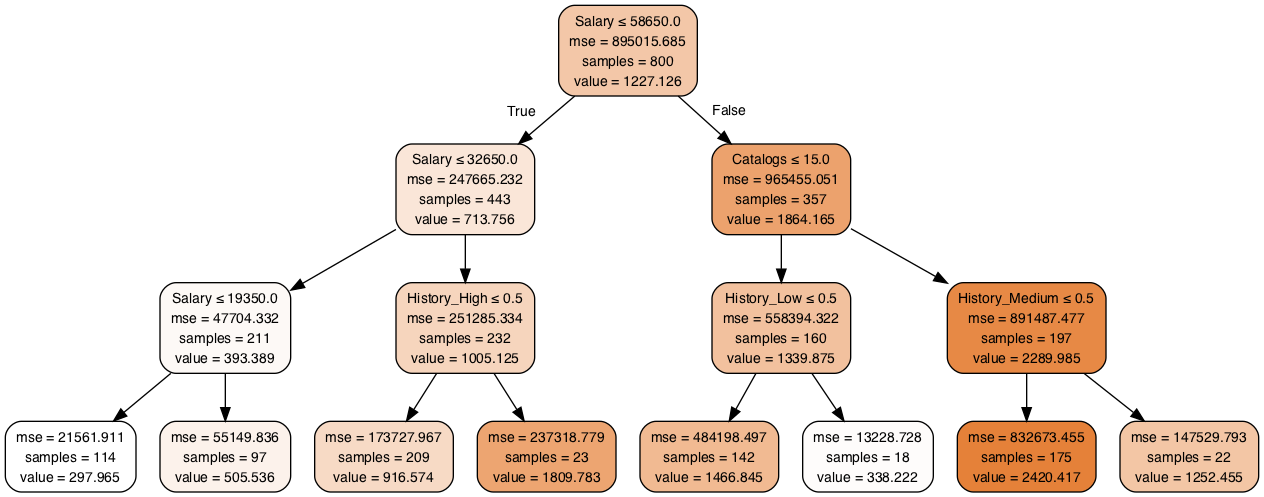

In [50]:
#Visualization of Decision Tree Regressor
dot_data = tree.export_graphviz(reg,out_file =None,
                                feature_names = X.columns,
                                filled = True, rounded = True,
                                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph.create_png())